In [64]:
#OS libs
import os
import pickle
#Data handling tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
#Warningds
import warnings
warnings.filterwarnings('ignore')
#Deep learning libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import efficientnet, VGG16, ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import load_model

In [2]:
train_path = 'Training'

filepaths =[]
labels = []

folds = os.listdir(train_path)

for fold in folds:
    f_path = os.path.join(train_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [3]:
train_df

,filepaths,label
0,Training\glioma\Tr-glTr_0000.jpg,glioma
1,Training\glioma\Tr-glTr_0001.jpg,glioma
2,Training\glioma\Tr-glTr_0002.jpg,glioma
3,Training\glioma\Tr-glTr_0003.jpg,glioma
4,Training\glioma\Tr-glTr_0004.jpg,glioma
...,...,...
5707,Training\pituitary\Tr-pi_1452.jpg,pituitary
5708,Training\pituitary\Tr-pi_1453.jpg,pituitary
5709,Training\pituitary\Tr-pi_1454.jpg,pituitary
5710,Training\pituitary\Tr-pi_1455.jpg,pituitary


In [4]:
test_path = 'Testing'

filepaths =[]
labels = []

folds = os.listdir(test_path)

for fold in folds:
    f_path = os.path.join(test_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test_df = pd.concat([Fseries , Lseries] , axis = 1)

In [5]:
test_df

,filepaths,label
0,Testing\glioma\Te-glTr_0000.jpg,glioma
1,Testing\glioma\Te-glTr_0001.jpg,glioma
2,Testing\glioma\Te-glTr_0002.jpg,glioma
3,Testing\glioma\Te-glTr_0003.jpg,glioma
4,Testing\glioma\Te-glTr_0004.jpg,glioma
...,...,...
1306,Testing\pituitary\Te-pi_0295.jpg,pituitary
1307,Testing\pituitary\Te-pi_0296.jpg,pituitary
1308,Testing\pituitary\Te-pi_0297.jpg,pituitary
1309,Testing\pituitary\Te-pi_0298.jpg,pituitary


In [6]:
train , val = train_test_split(train_df , test_size = 0.2 , shuffle = True , random_state= 42)

In [7]:
train

,filepaths,label
4695,Training\pituitary\Tr-pi_0440.jpg,pituitary
4489,Training\pituitary\Tr-pi_0234.jpg,pituitary
219,Training\glioma\Tr-gl_0219.jpg,glioma
2843,Training\notumor\Tr-no_0183.jpg,notumor
1115,Training\glioma\Tr-gl_1115.jpg,glioma
...,...,...
3772,Training\notumor\Tr-no_1112.jpg,notumor
5191,Training\pituitary\Tr-pi_0936.jpg,pituitary
5226,Training\pituitary\Tr-pi_0971.jpg,pituitary
5390,Training\pituitary\Tr-pi_1135.jpg,pituitary


In [8]:
val

,filepaths,label
1700,Training\meningioma\Tr-me_0379.jpg,meningioma
3269,Training\notumor\Tr-no_0609.jpg,notumor
561,Training\glioma\Tr-gl_0561.jpg,glioma
5465,Training\pituitary\Tr-pi_1210.jpg,pituitary
5460,Training\pituitary\Tr-pi_1205.jpg,pituitary
...,...,...
803,Training\glioma\Tr-gl_0803.jpg,glioma
857,Training\glioma\Tr-gl_0857.jpg,glioma
2977,Training\notumor\Tr-no_0317.jpg,notumor
2287,Training\meningioma\Tr-me_0966.jpg,meningioma


In [9]:
train_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()

In [10]:
train_images = train_generator.flow_from_dataframe(train , x_col = 'filepaths' , y_col = 'label' , target_size = (224 ,244) ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =32)

val_images = train_generator.flow_from_dataframe(val , x_col = 'filepaths' , y_col = 'label' , target_size = (224 ,244) , 
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = 32)

test_images = test_generator.flow_from_dataframe(test_df , x_col= 'filepaths' , y_col = 'label' , target_size = (224 ,244) , 
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = 32)

Found 4569 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


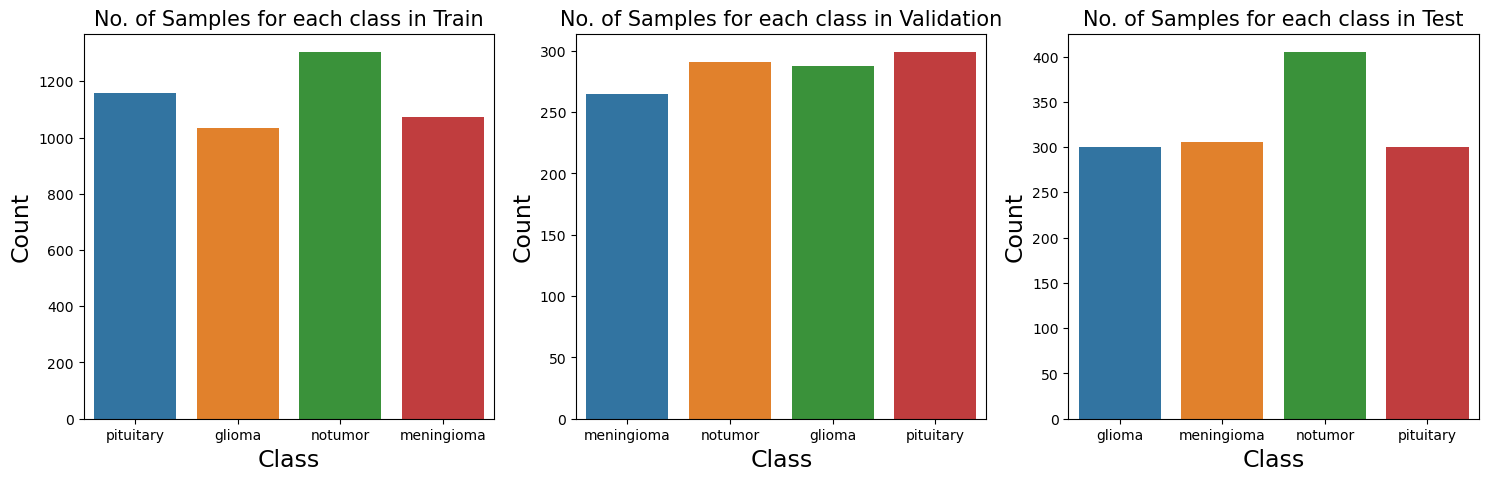

In [11]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.countplot(x=train.label)
plt.xlabel("Class",fontsize=17)
plt.title("No. of Samples for each class in Train",fontsize=15)
plt.ylabel('Count',fontsize=17)
plt.subplot(1,3,2)
sns.countplot(x=val.label)
plt.xlabel("Class",fontsize=17)
plt.title("No. of Samples for each class in Validation",fontsize=15)
plt.ylabel('Count',fontsize=17)
plt.subplot(1,3,3)
sns.countplot(x=test_df.label)
plt.xlabel("Class",fontsize=17)
plt.title("No. of Samples for each class in Test",fontsize=15)
plt.ylabel('Count',fontsize=17)
plt.show()

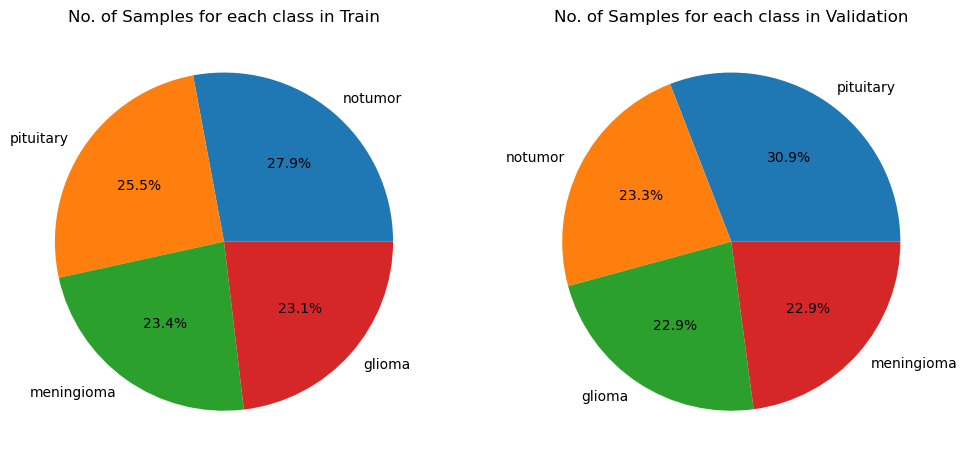

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.pie(train_df.label.value_counts(),labels=train.label.value_counts().index,autopct ='%1.1f%%')
plt.title("No. of Samples for each class in Train",fontsize=12)
plt.subplot(1,2,2)
plt.pie(test_df.label.value_counts(),labels=val.label.value_counts().index,autopct ='%1.1f%%')
plt.title("No. of Samples for each class in Validation",fontsize=12)
plt.show()

Text(0.5, 1.0, 'No. of Samples for each class in Test')

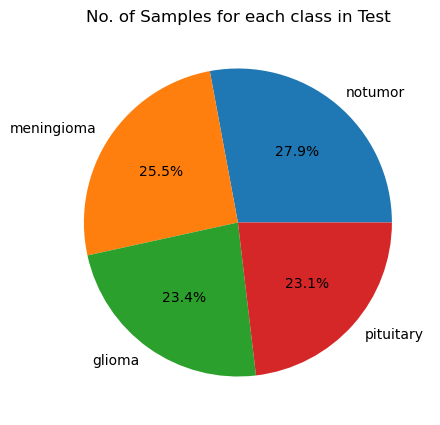

In [13]:
plt.figure(figsize=(12,5))
plt.pie(train_df.label.value_counts(),labels=test_df.label.value_counts().index,autopct ='%1.1f%%')
plt.title("No. of Samples for each class in Test",fontsize=12)

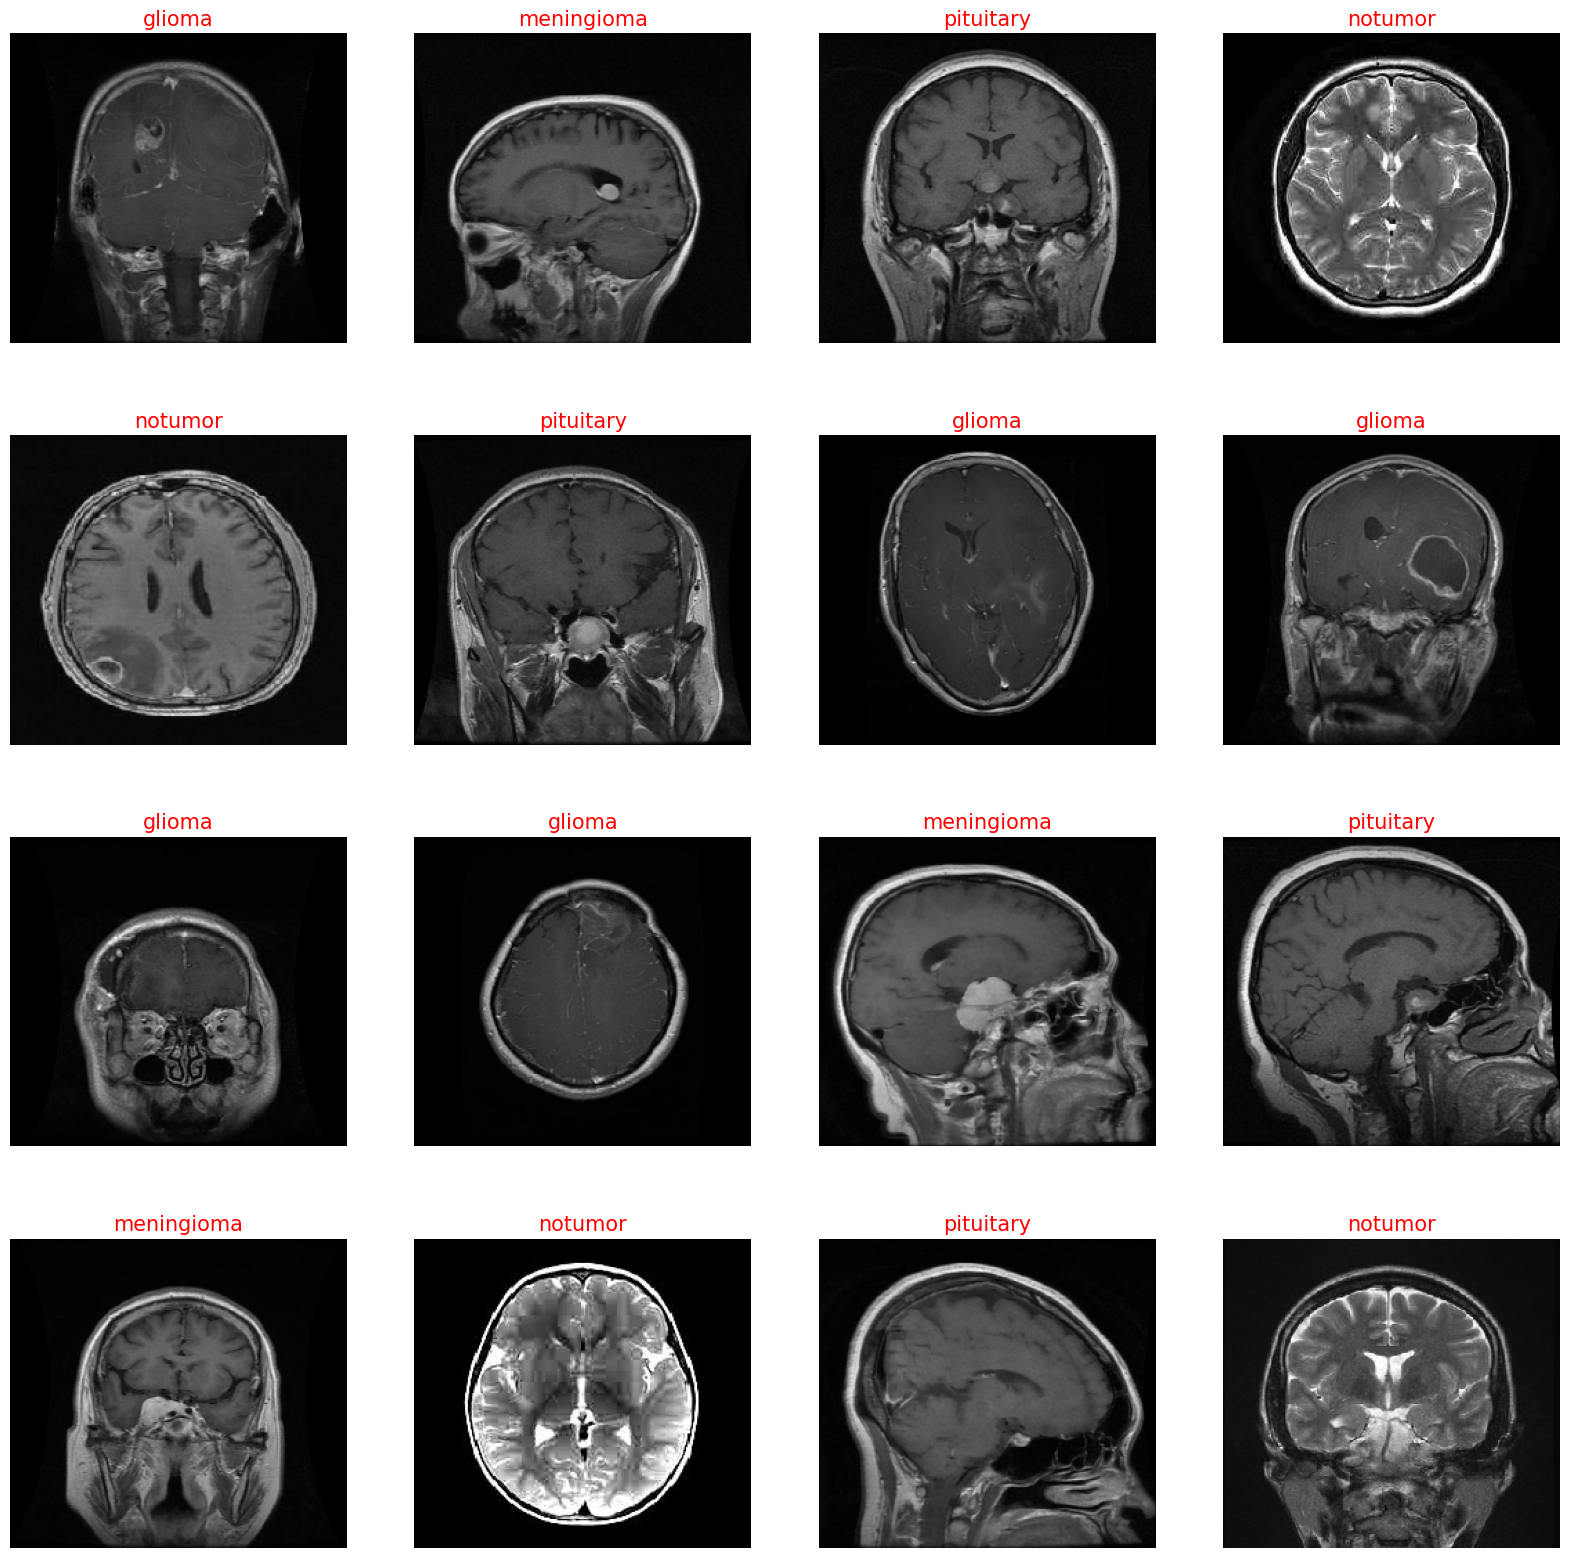

In [14]:
g_dict = train_images.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_images)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'red', fontsize= 15)
    plt.axis('off')
plt.show()

In [15]:
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [16]:
def plot_training_history(history, figsize=(20, 8), background_color='#F8F9FA', 
                          loss_colors=('orange', 'blue', 'red'), acc_colors=('green', 'purple', 'red'),
                          loss_linestyles=('-', '--'), acc_linestyles=('-', '--'), font_size=17):
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]

    index_acc = np.argmax(val_acc)
    val_highest = val_acc[index_acc]

    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, loss_colors[0], label='Training Loss', linestyle=loss_linestyles[0], linewidth=2)
    plt.plot(epochs, val_loss, loss_colors[1], label='Validation Loss', linestyle=loss_linestyles[1], linewidth=2)
    plt.scatter(index_loss + 1, val_lowest, s=150, c=loss_colors[2], label=f'Best Loss: {index_loss + 1}')
    plt.title('Training and Validation Loss', fontsize=font_size)
    plt.xlabel('Epochs', fontsize=font_size)
    plt.ylabel('Loss', fontsize=font_size)
    plt.legend(fontsize=font_size - 2)
    plt.xticks(fontsize=font_size - 2)
    plt.yticks(fontsize=font_size - 2)
    plt.grid(True)
    plt.tight_layout()
    plt.gca().set_facecolor(background_color)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, acc_colors[0], label='Training Accuracy', linestyle=acc_linestyles[0], linewidth=2)
    plt.plot(epochs, val_acc, acc_colors[1], label='Validation Accuracy', linestyle=acc_linestyles[1], linewidth=2)
    plt.scatter(index_acc + 1, val_highest, s=150, c=acc_colors[2], label=f'Best Accuracy: {index_acc + 1}')
    plt.title('Training and Validation Accuracy', fontsize=font_size)
    plt.xlabel('Epochs', fontsize=font_size)
    plt.ylabel('Accuracy', fontsize=font_size)
    plt.legend(fontsize=font_size - 2)
    plt.xticks(fontsize=font_size - 2)
    plt.yticks(fontsize=font_size - 2)
    plt.grid(True)
    plt.tight_layout()
    plt.gca().set_facecolor(background_color)

    plt.show()

### EfficientNet

In [17]:
EN_model = efficientnet.EfficientNetB3(include_top = False, weights = 'imagenet', input_shape = (224,224,3), pooling= 'max')

In [18]:
EN_model.trainable = False

In [19]:
model = Sequential()
model.add(EN_model)

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.4))
model.add(Dense(4, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=4,
            restore_best_weights=True
        )
    ]
)

Epoch 1/20
143/143 [==============================] - 240s 2s/step - loss: 0.5734 - accuracy: 0.8142 - val_loss: 0.2392 - val_accuracy: 0.9221
Epoch 2/20
143/143 [==============================] - 240s 2s/step - loss: 0.2739 - accuracy: 0.8998 - val_loss: 0.1730 - val_accuracy: 0.9300
Epoch 3/20
143/143 [==============================] - 242s 2s/step - loss: 0.2213 - accuracy: 0.9236 - val_loss: 0.1539 - val_accuracy: 0.9370
Epoch 4/20
143/143 [==============================] - 257s 2s/step - loss: 0.1718 - accuracy: 0.9354 - val_loss: 0.1651 - val_accuracy: 0.9414
Epoch 5/20
143/143 [==============================] - 238s 2s/step - loss: 0.1381 - accuracy: 0.9494 - val_loss: 0.1540 - val_accuracy: 0.9440
Epoch 6/20
143/143 [==============================] - 230s 2s/step - loss: 0.1434 - accuracy: 0.9508 - val_loss: 0.1580 - val_accuracy: 0.9414
Epoch 7/20
143/143 [==============================] - 229s 2s/step - loss: 0.1138 - accuracy: 0.9586 - val_loss: 0.1459 - val_accuracy: 0.9484

In [22]:
CLASS_NAMES = list(train_images.class_indices.keys())
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f} %".format(acc * 100))
print("Classification Report:\n-----------------------------\n", clr)

41/41 [==============================] - 54s 1s/step
Test Accuracy: 96.644 %
Classification Report:
-----------------------------
               precision    recall  f1-score   support

      glioma       0.97      0.92      0.95       300
  meningioma       0.92      0.95      0.93       306
     notumor       0.99      1.00      1.00       405
   pituitary       0.98      0.98      0.98       300

    accuracy                           0.97      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.97      0.97      0.97      1311



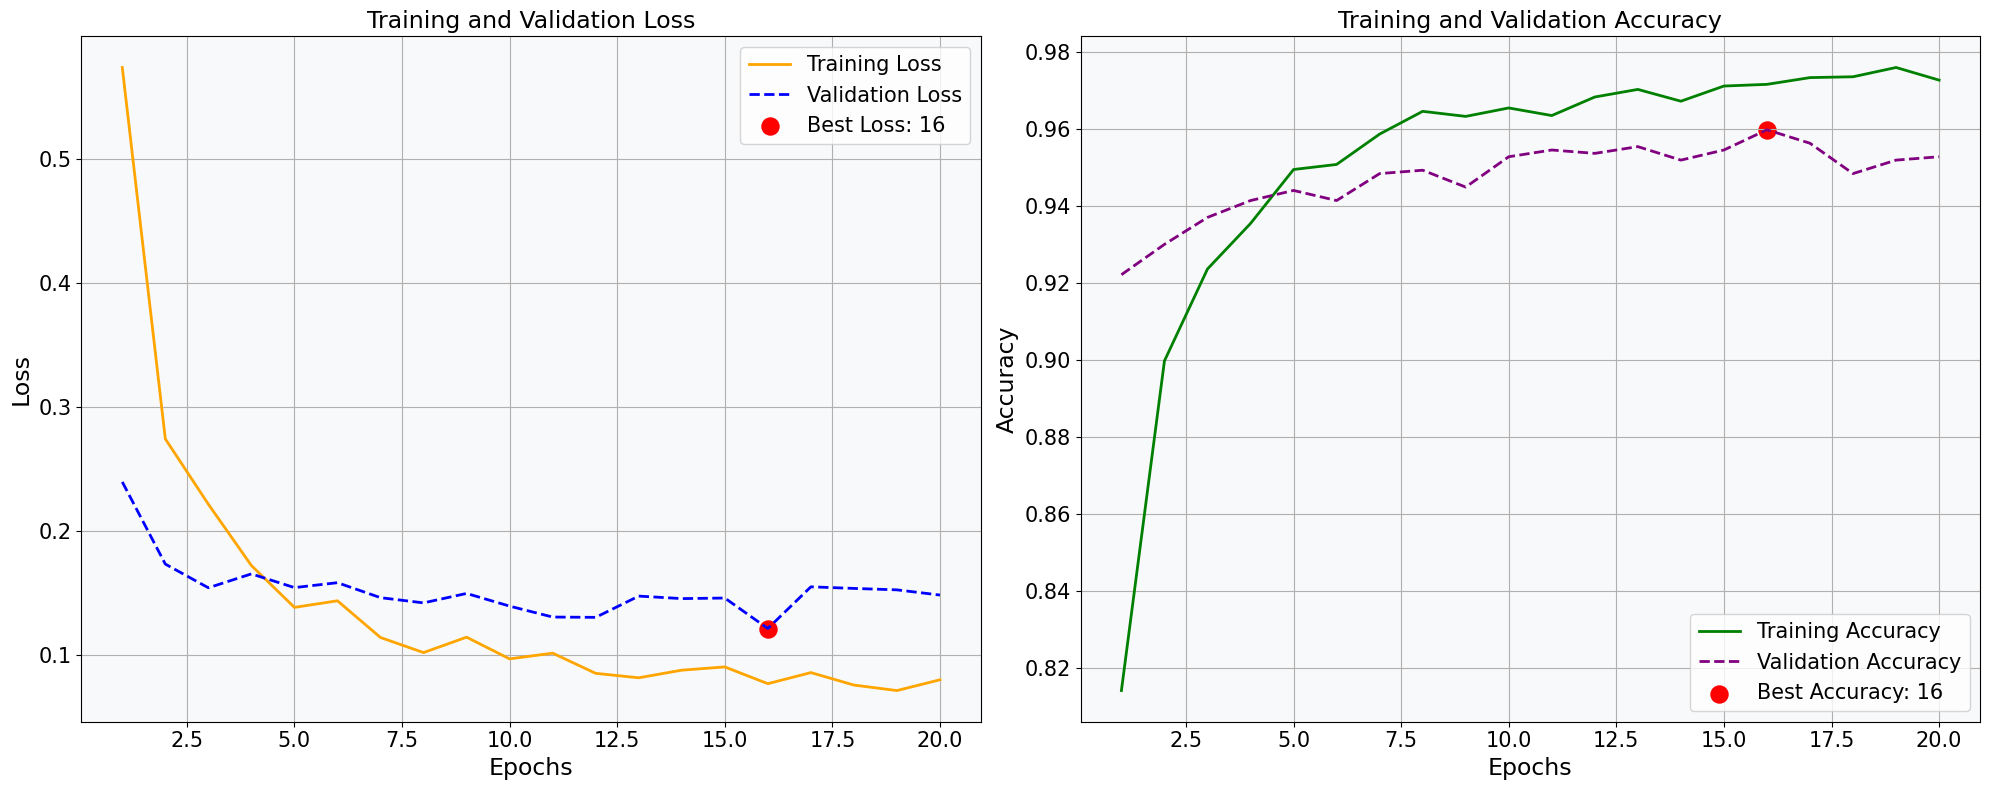

In [23]:
plot_training_history(history)

In [24]:
train_score = model.evaluate(train_images)
valid_score = model.evaluate(val_images)
test_score = model.evaluate(test_images)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

41/41 [==============================] - 53s 1s/step - loss: 0.1180 - accuracy: 0.9664
Train Loss:  0.008313629776239395
Train Accuracy:  0.9982490539550781
--------------------
Validation Loss:  0.1210361197590828
Validation Accuracy:  0.959755003452301
--------------------
Test Loss:  0.11802118271589279
Test Accuracy:  0.966437816619873


In [25]:
def save_history(history, path):
    pickle.dump(history, open(path, 'wb'))

In [26]:
save_history(history, "history.pkl")

In [27]:
model.save('model.h5')

### MobileNet

In [35]:
mobile_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobile_model.trainable = False

In [36]:
model=Sequential()

model.add(mobile_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 256)               327936    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 2586948 (9.87 MB)
Trainable params: 3289

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history2 = model.fit(
    train_images,
    validation_data=val_images,
    epochs=25,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=4,
            restore_best_weights=True
        )
    ]
)

Epoch 1/25
143/143 [==============================] - 69s 471ms/step - loss: 0.5833 - accuracy: 0.7789 - val_loss: 0.3425 - val_accuracy: 0.8661
Epoch 2/25
143/143 [==============================] - 70s 487ms/step - loss: 0.3569 - accuracy: 0.8671 - val_loss: 0.3010 - val_accuracy: 0.8906
Epoch 3/25
143/143 [==============================] - 74s 517ms/step - loss: 0.3096 - accuracy: 0.8910 - val_loss: 0.2723 - val_accuracy: 0.8959
Epoch 4/25
143/143 [==============================] - 73s 508ms/step - loss: 0.2765 - accuracy: 0.8976 - val_loss: 0.2556 - val_accuracy: 0.9055
Epoch 5/25
143/143 [==============================] - 71s 497ms/step - loss: 0.2492 - accuracy: 0.9072 - val_loss: 0.2531 - val_accuracy: 0.9090
Epoch 6/25
143/143 [==============================] - 73s 510ms/step - loss: 0.2484 - accuracy: 0.9081 - val_loss: 0.2489 - val_accuracy: 0.9055
Epoch 7/25
143/143 [==============================] - 72s 501ms/step - loss: 0.2141 - accuracy: 0.9216 - val_loss: 0.2386 - val_ac

In [39]:
CLASS_NAMES = list(train_images.class_indices.keys())
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f} %".format(acc * 100))
print("Classification Report:\n-----------------------------\n", clr)

41/41 [==============================] - 18s 414ms/step
Test Accuracy: 91.457 %
Classification Report:
-----------------------------
               precision    recall  f1-score   support

      glioma       0.91      0.84      0.87       300
  meningioma       0.83      0.82      0.83       306
     notumor       0.96      0.99      0.98       405
   pituitary       0.94      0.98      0.96       300

    accuracy                           0.91      1311
   macro avg       0.91      0.91      0.91      1311
weighted avg       0.91      0.91      0.91      1311



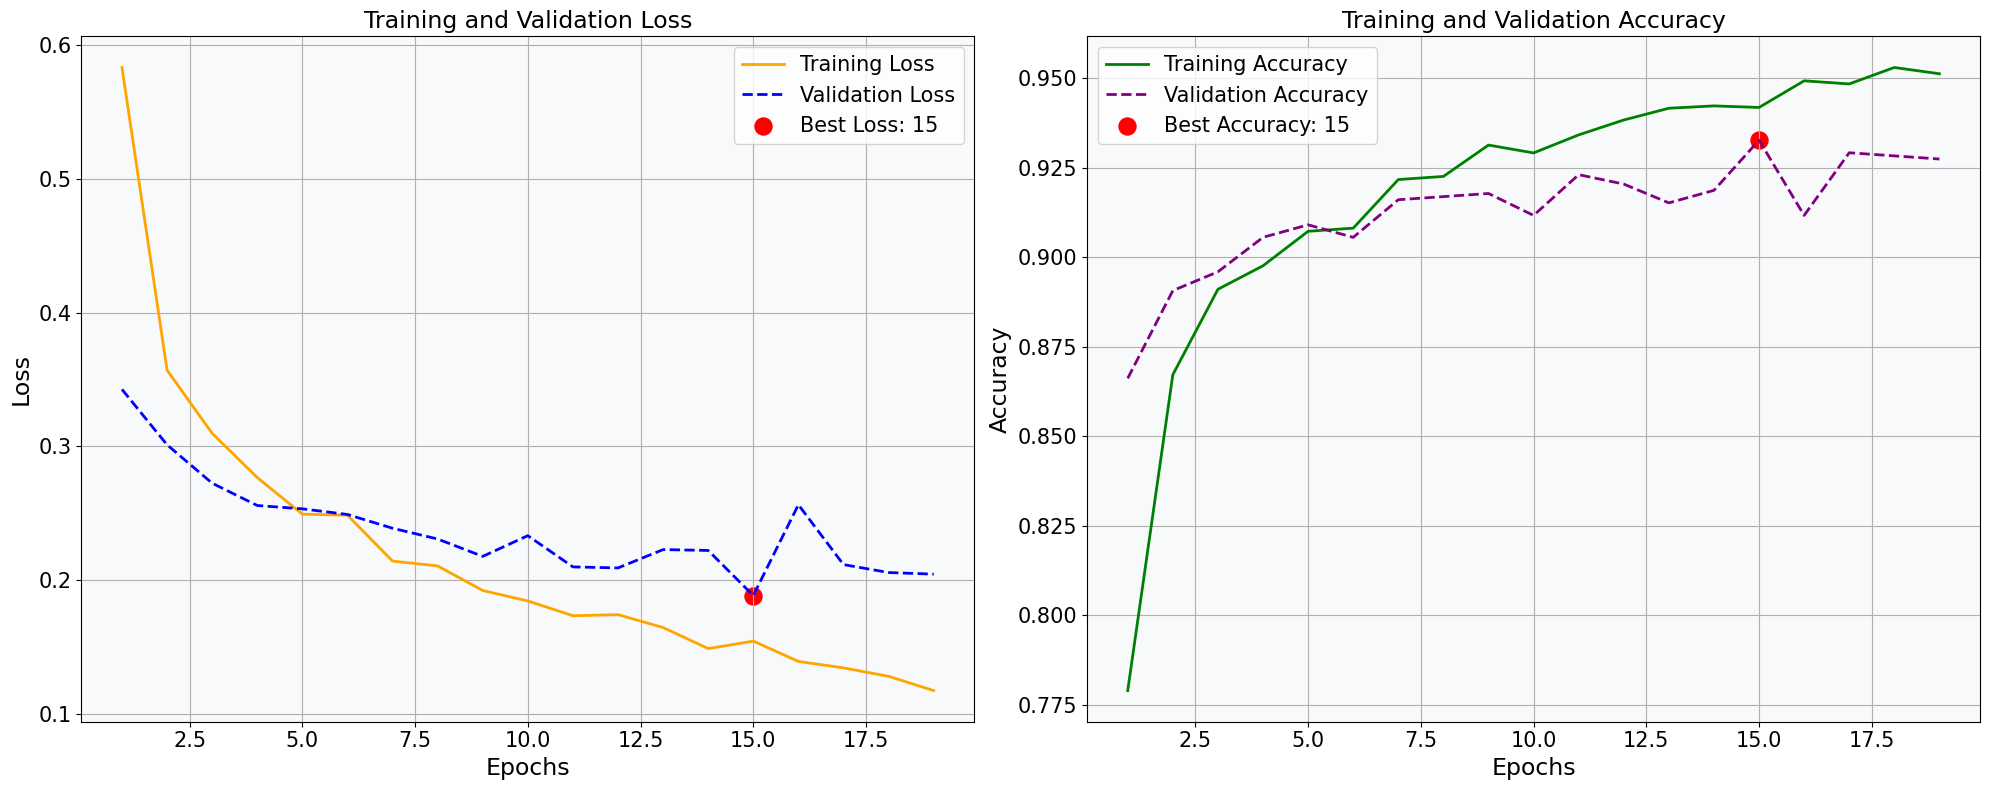

In [40]:
plot_training_history(history2)

In [41]:
train_score = model.evaluate(train_images)
valid_score = model.evaluate(val_images)
test_score = model.evaluate(test_images)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

41/41 [==============================] - 16s 392ms/step - loss: 0.2346 - accuracy: 0.9146
Train Loss:  0.09132222086191177
Train Accuracy:  0.970234215259552
--------------------
Validation Loss:  0.18830983340740204
Validation Accuracy:  0.9326333999633789
--------------------
Test Loss:  0.23464390635490417
Test Accuracy:  0.9145690202713013


In [42]:
save_history(history2, "history2.pkl")

In [43]:
model.save('model2.h5')

### VGG

In [44]:
vgg_model = VGG16(input_shape=(224,224,3),include_top=False, weights='imagenet')
vgg_model.trainable = False

In [45]:
model=Sequential()

model.add(vgg_model)
model.add(Flatten()) 
model.add(BatchNormalization())
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_2 (Bat  (None, 25088)             100352    
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 1028      
                                                      

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
history3 = model.fit(
    train_images,
    validation_data=val_images,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=4,
            restore_best_weights=True
        )
    ]
)

Epoch 1/20
143/143 [==============================] - 341s 2s/step - loss: 1.3567 - accuracy: 0.8488 - val_loss: 0.6580 - val_accuracy: 0.9230
Epoch 2/20
143/143 [==============================] - 356s 2s/step - loss: 0.3360 - accuracy: 0.9431 - val_loss: 0.4943 - val_accuracy: 0.9318
Epoch 3/20
143/143 [==============================] - 365s 3s/step - loss: 0.1893 - accuracy: 0.9608 - val_loss: 0.6150 - val_accuracy: 0.9431
Epoch 4/20
143/143 [==============================] - 372s 3s/step - loss: 0.1370 - accuracy: 0.9726 - val_loss: 0.5448 - val_accuracy: 0.9563
Epoch 5/20
143/143 [==============================] - 376s 3s/step - loss: 0.0981 - accuracy: 0.9755 - val_loss: 0.4204 - val_accuracy: 0.9493
Epoch 6/20
143/143 [==============================] - 379s 3s/step - loss: 0.0804 - accuracy: 0.9783 - val_loss: 0.4481 - val_accuracy: 0.9423
Epoch 7/20
143/143 [==============================] - 381s 3s/step - loss: 0.0704 - accuracy: 0.9860 - val_loss: 0.4048 - val_accuracy: 0.9501

In [48]:
CLASS_NAMES = list(train_images.class_indices.keys())
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f} %".format(acc * 100))
print("Classification Report:\n-----------------------------\n", clr)

41/41 [==============================] - 86s 2s/step
Test Accuracy: 94.813 %
Classification Report:
-----------------------------
               precision    recall  f1-score   support

      glioma       0.98      0.86      0.92       300
  meningioma       0.85      0.95      0.90       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.98      0.96      0.97       300

    accuracy                           0.95      1311
   macro avg       0.95      0.94      0.94      1311
weighted avg       0.95      0.95      0.95      1311



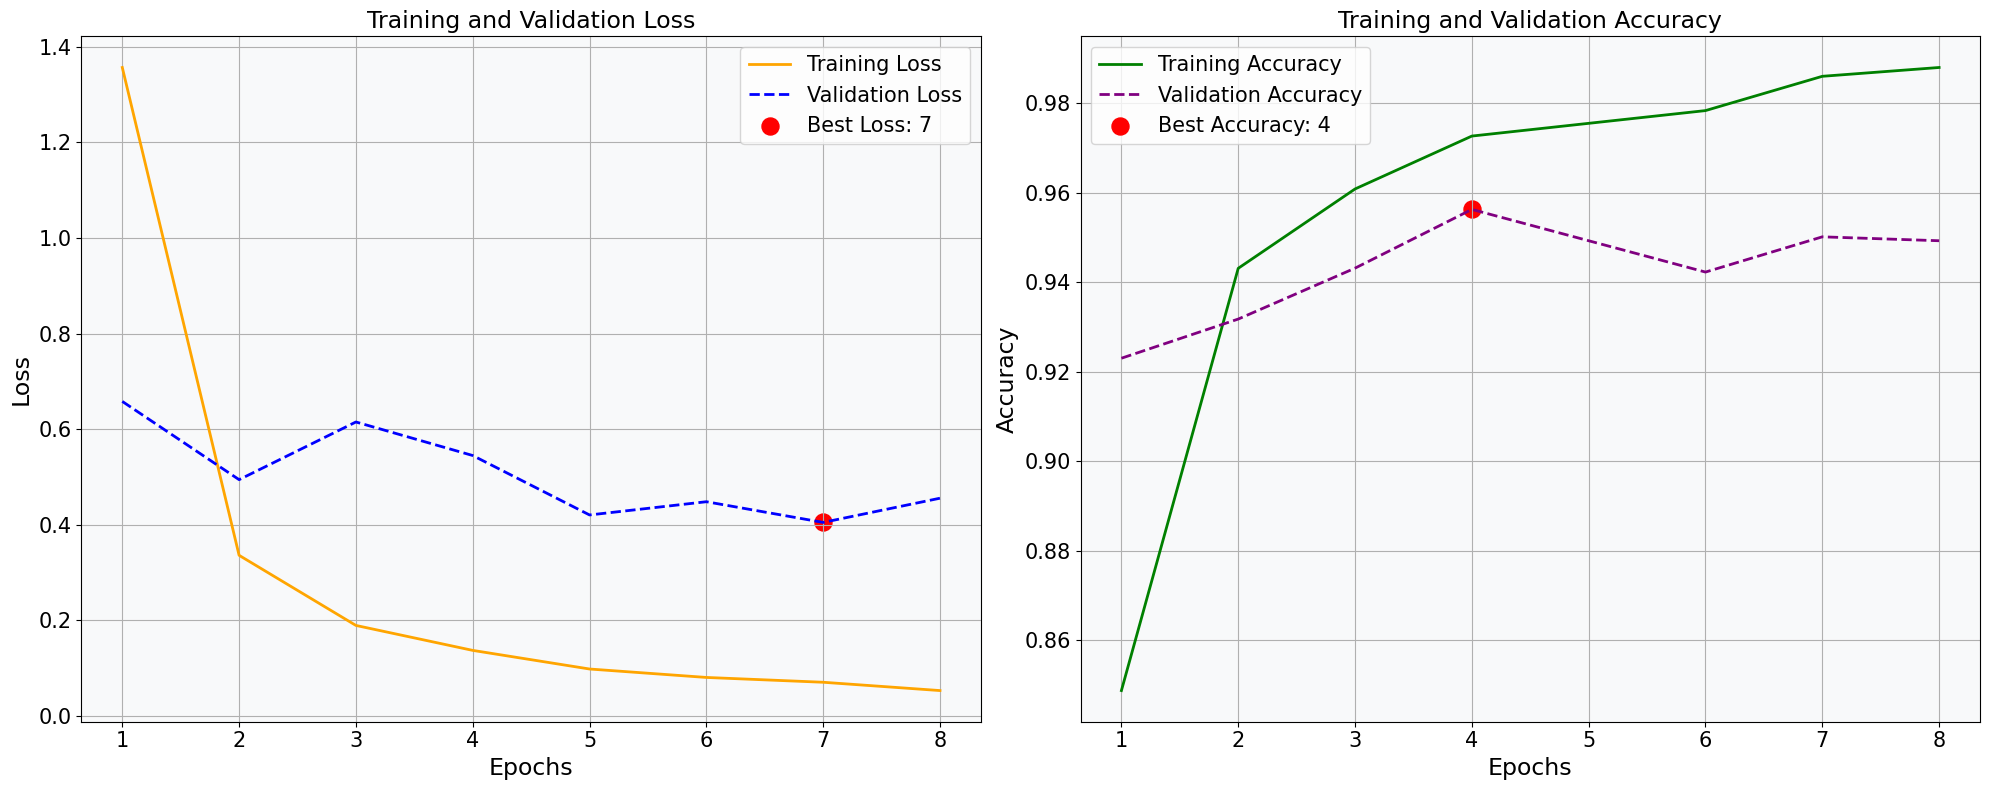

In [49]:
plot_training_history(history3)

In [50]:
train_score = model.evaluate(train_images)
valid_score = model.evaluate(val_images)
test_score = model.evaluate(test_images)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

41/41 [==============================] - 86s 2s/step - loss: 0.5163 - accuracy: 0.9481
Train Loss:  0.021915236487984657
Train Accuracy:  0.9958415627479553
--------------------
Validation Loss:  0.5447702407836914
Validation Accuracy:  0.9562554955482483
--------------------
Test Loss:  0.5163169503211975
Test Accuracy:  0.9481312036514282


In [51]:
save_history(history3, "history3.pkl")

In [52]:
model.save('model3.h5')

### ResNet

In [53]:
res_model = ResNet50(input_shape=(224,224,3), include_top=False, weights='imagenet')
res_model.trainable = False

In [54]:
model=Sequential()

model.add(res_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 23595908 (90.01 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
history4 = model.fit(
    train_images,
    validation_data=val_images,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=4,
            restore_best_weights=True
        )
    ]
)

Epoch 1/20
143/143 [==============================] - 219s 2s/step - loss: 0.5489 - accuracy: 0.7984 - val_loss: 0.3261 - val_accuracy: 0.8898
Epoch 2/20
143/143 [==============================] - 218s 2s/step - loss: 0.2658 - accuracy: 0.9046 - val_loss: 0.2963 - val_accuracy: 0.8941
Epoch 3/20
143/143 [==============================] - 218s 2s/step - loss: 0.2115 - accuracy: 0.9256 - val_loss: 0.2221 - val_accuracy: 0.9195
Epoch 4/20
143/143 [==============================] - 219s 2s/step - loss: 0.1751 - accuracy: 0.9387 - val_loss: 0.2089 - val_accuracy: 0.9265
Epoch 5/20
143/143 [==============================] - 219s 2s/step - loss: 0.1507 - accuracy: 0.9473 - val_loss: 0.2190 - val_accuracy: 0.9151
Epoch 6/20
143/143 [==============================] - 219s 2s/step - loss: 0.1385 - accuracy: 0.9562 - val_loss: 0.1859 - val_accuracy: 0.9291
Epoch 7/20
143/143 [==============================] - 219s 2s/step - loss: 0.1266 - accuracy: 0.9602 - val_loss: 0.1825 - val_accuracy: 0.9353

In [57]:
CLASS_NAMES = list(train_images.class_indices.keys())
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f} %".format(acc * 100))
print("Classification Report:\n-----------------------------\n", clr)

41/41 [==============================] - 51s 1s/step
Test Accuracy: 94.279 %
Classification Report:
-----------------------------
               precision    recall  f1-score   support

      glioma       0.95      0.87      0.91       300
  meningioma       0.88      0.90      0.89       306
     notumor       0.97      1.00      0.99       405
   pituitary       0.96      0.99      0.98       300

    accuracy                           0.94      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.94      0.94      0.94      1311



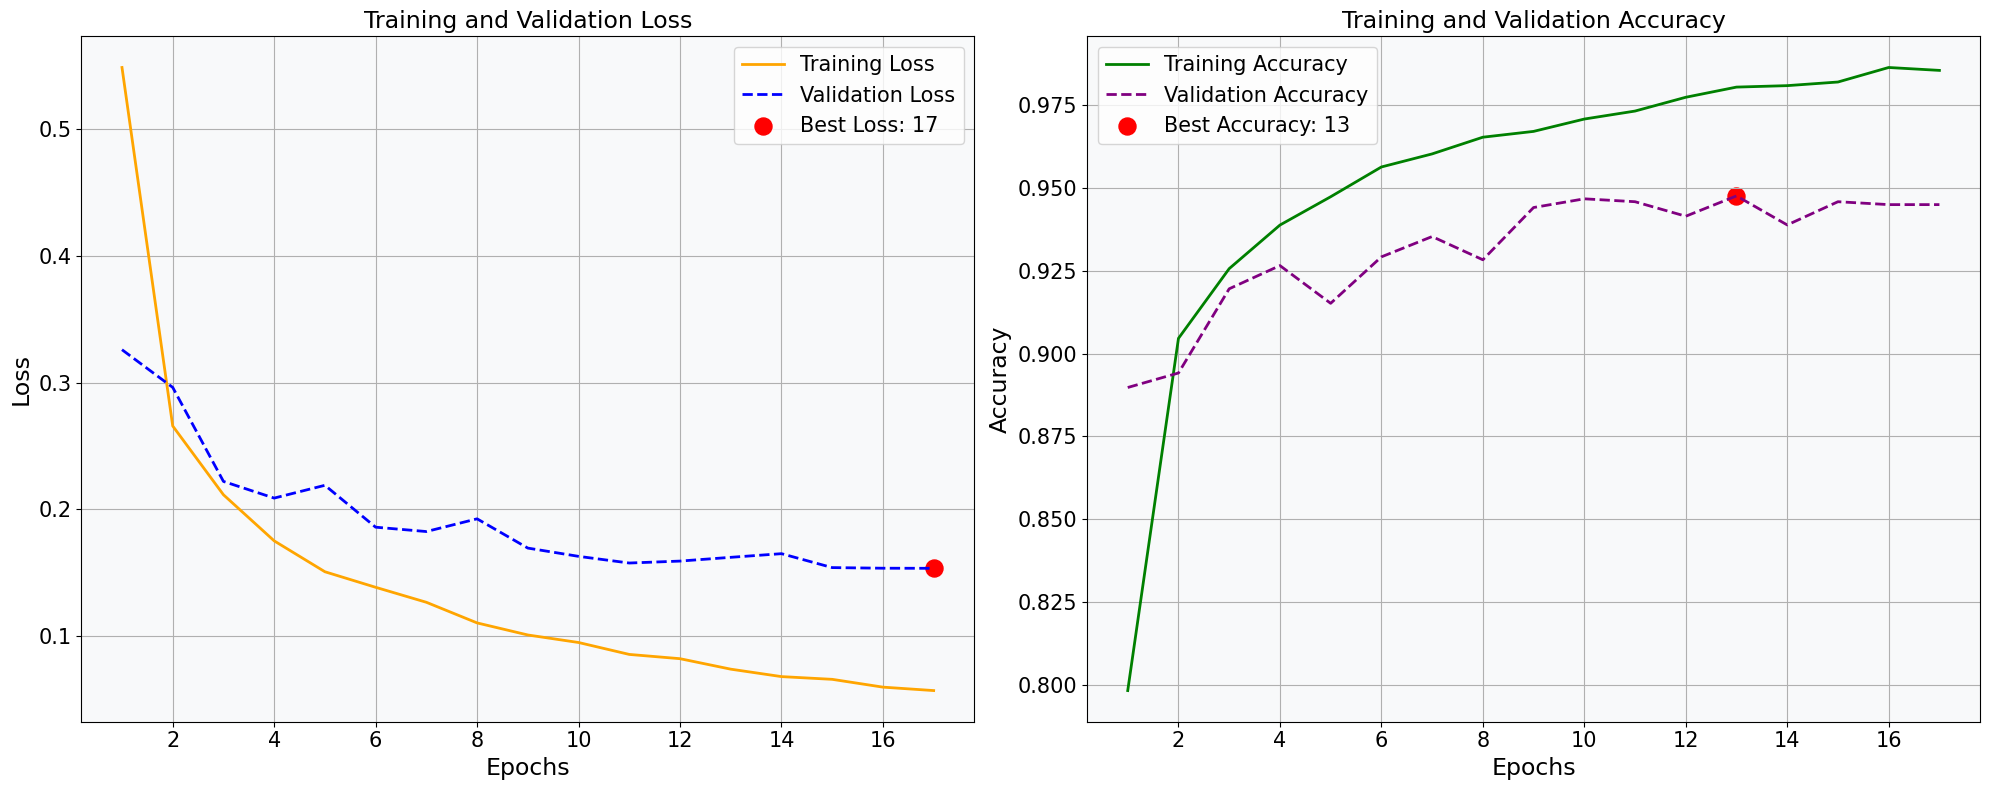

In [58]:
plot_training_history(history4)

In [65]:
# model = load_model('model4.h5')

In [66]:
train_score = model.evaluate(train_images)
valid_score = model.evaluate(val_images)
test_score = model.evaluate(test_images)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

41/41 [==============================] - 53s 1s/step - loss: 0.1693 - accuracy: 0.9428
Train Loss:  0.06061866506934166
Train Accuracy:  0.9851170778274536
--------------------
Validation Loss:  0.16212517023086548
Validation Accuracy:  0.9475065469741821
--------------------
Test Loss:  0.1693066656589508
Test Accuracy:  0.942791759967804


In [59]:
save_history(history4, "history4.pkl")

In [60]:
model.save('model4.h5')

### VGG with additional Conv layer

In [83]:
model = Sequential()
model.add(vgg_model)

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 64)          294976    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_3  (None, 64)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 4)                

In [84]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [85]:
history5 = model.fit(
    train_images,
    validation_data=val_images,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=4,
            restore_best_weights=True
        )
    ]
)

Epoch 1/20
143/143 [==============================] - 348s 2s/step - loss: 0.9668 - accuracy: 0.8113 - val_loss: 0.2831 - val_accuracy: 0.8968
Epoch 2/20
143/143 [==============================] - 356s 2s/step - loss: 0.2146 - accuracy: 0.9258 - val_loss: 0.2478 - val_accuracy: 0.9169
Epoch 3/20
143/143 [==============================] - 367s 3s/step - loss: 0.0974 - accuracy: 0.9650 - val_loss: 0.1946 - val_accuracy: 0.9326
Epoch 4/20
143/143 [==============================] - 364s 3s/step - loss: 0.0578 - accuracy: 0.9814 - val_loss: 0.1846 - val_accuracy: 0.9353
Epoch 5/20
143/143 [==============================] - 363s 3s/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.2217 - val_accuracy: 0.9405
Epoch 6/20
143/143 [==============================] - 372s 3s/step - loss: 0.0240 - accuracy: 0.9928 - val_loss: 0.2139 - val_accuracy: 0.9449
Epoch 7/20
143/143 [==============================] - 397s 3s/step - loss: 0.0113 - accuracy: 0.9976 - val_loss: 0.1873 - val_accuracy: 0.9484

In [86]:
CLASS_NAMES = list(train_images.class_indices.keys())
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f} %".format(acc * 100))
print("Classification Report:\n-----------------------------\n", clr)

41/41 [==============================] - 71s 2s/step
Test Accuracy: 96.262 %
Classification Report:
-----------------------------
               precision    recall  f1-score   support

      glioma       0.97      0.91      0.94       300
  meningioma       0.91      0.94      0.93       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.97      0.99      0.98       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



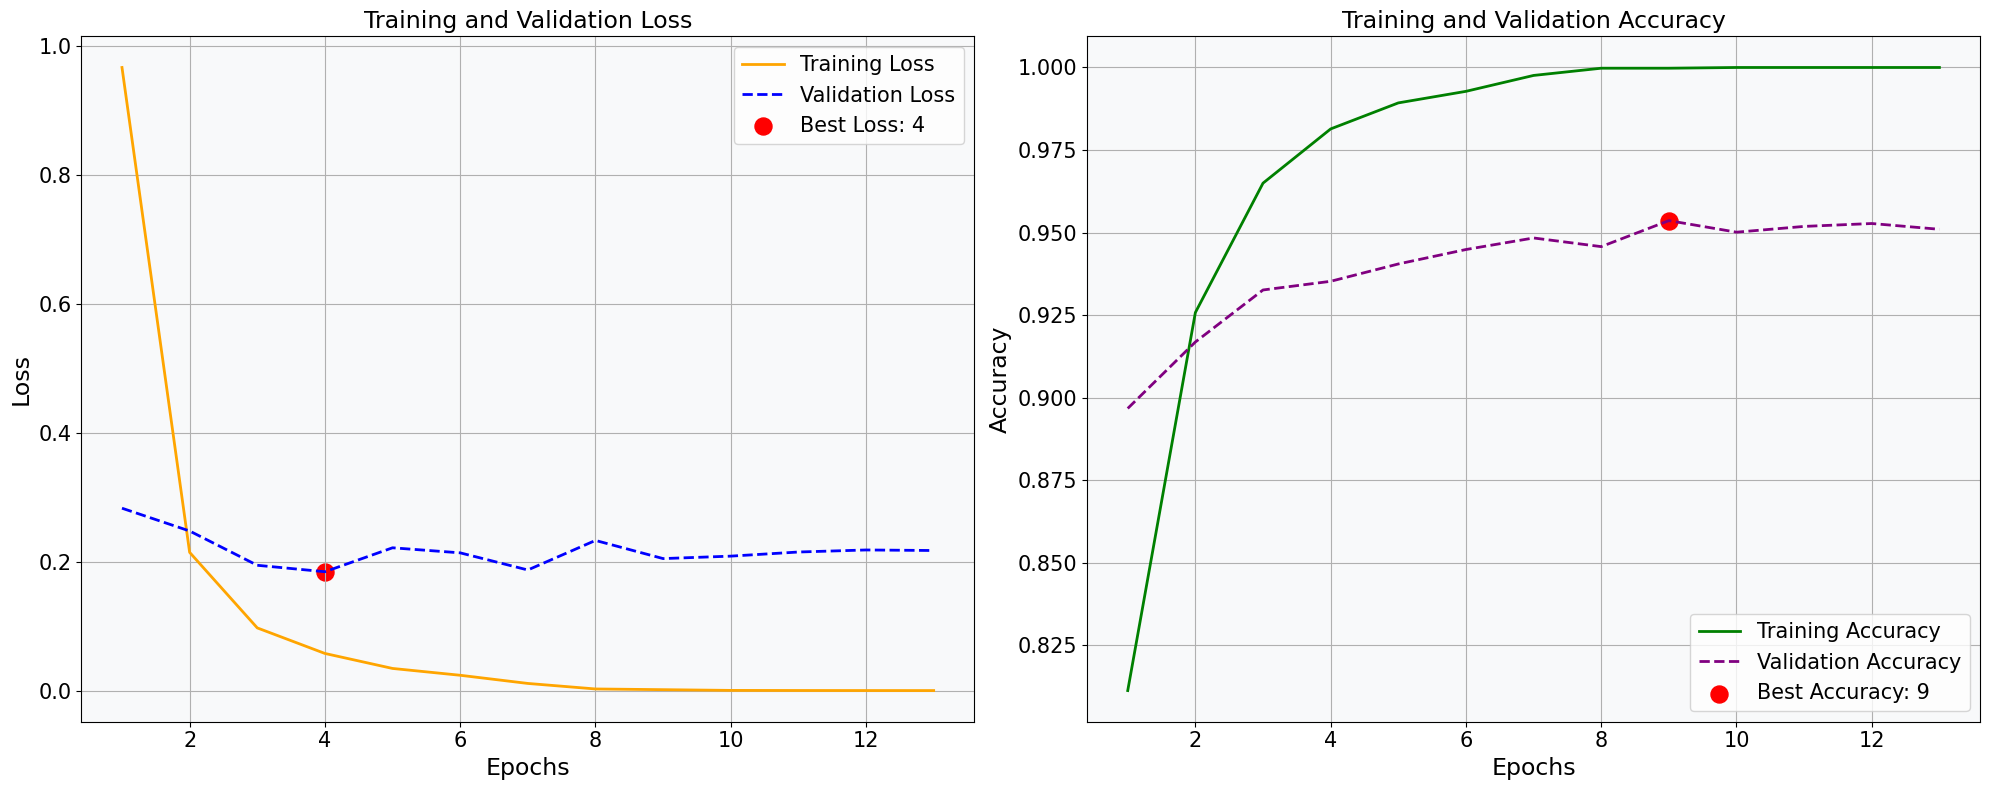

In [87]:
plot_training_history(history5)

In [88]:
train_score = model.evaluate(train_images)
valid_score = model.evaluate(val_images)
test_score = model.evaluate(test_images)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

41/41 [==============================] - 76s 2s/step - loss: 0.1767 - accuracy: 0.9626
Train Loss:  0.0005453139310702682
Train Accuracy:  1.0
--------------------
Validation Loss:  0.20495514571666718
Validation Accuracy:  0.953630805015564
--------------------
Test Loss:  0.17672871053218842
Test Accuracy:  0.9626239538192749


In [73]:
save_history(history5, "history5.pkl")

In [74]:
model.save('model5.h5')

### ResNet with additional Conv layer

In [75]:
model = Sequential()
model.add(res_model)

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          1179712   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_2  (None, 64)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 4)                

In [76]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
history6 = model.fit(
    train_images,
    validation_data=val_images,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=4,
            restore_best_weights=True
        )
    ]
)

Epoch 1/20
143/143 [==============================] - 222s 2s/step - loss: 0.6932 - accuracy: 0.8223 - val_loss: 0.2445 - val_accuracy: 0.9116
Epoch 2/20
143/143 [==============================] - 210s 1s/step - loss: 0.1685 - accuracy: 0.9370 - val_loss: 0.1860 - val_accuracy: 0.9274
Epoch 3/20
143/143 [==============================] - 219s 2s/step - loss: 0.1051 - accuracy: 0.9641 - val_loss: 0.3040 - val_accuracy: 0.9230
Epoch 4/20
143/143 [==============================] - 221s 2s/step - loss: 0.0698 - accuracy: 0.9715 - val_loss: 0.1822 - val_accuracy: 0.9396
Epoch 5/20
143/143 [==============================] - 232s 2s/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.2418 - val_accuracy: 0.9361
Epoch 6/20
143/143 [==============================] - 222s 2s/step - loss: 0.0473 - accuracy: 0.9827 - val_loss: 0.2444 - val_accuracy: 0.9274
Epoch 7/20
143/143 [==============================] - 217s 2s/step - loss: 0.0208 - accuracy: 0.9930 - val_loss: 0.2234 - val_accuracy: 0.9466

In [78]:
CLASS_NAMES = list(train_images.class_indices.keys())
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f} %".format(acc * 100))
print("Classification Report:\n-----------------------------\n", clr)

41/41 [==============================] - 54s 1s/step
Test Accuracy: 96.339 %
Classification Report:
-----------------------------
               precision    recall  f1-score   support

      glioma       0.99      0.91      0.94       300
  meningioma       0.91      0.94      0.93       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.97      0.99      0.98       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



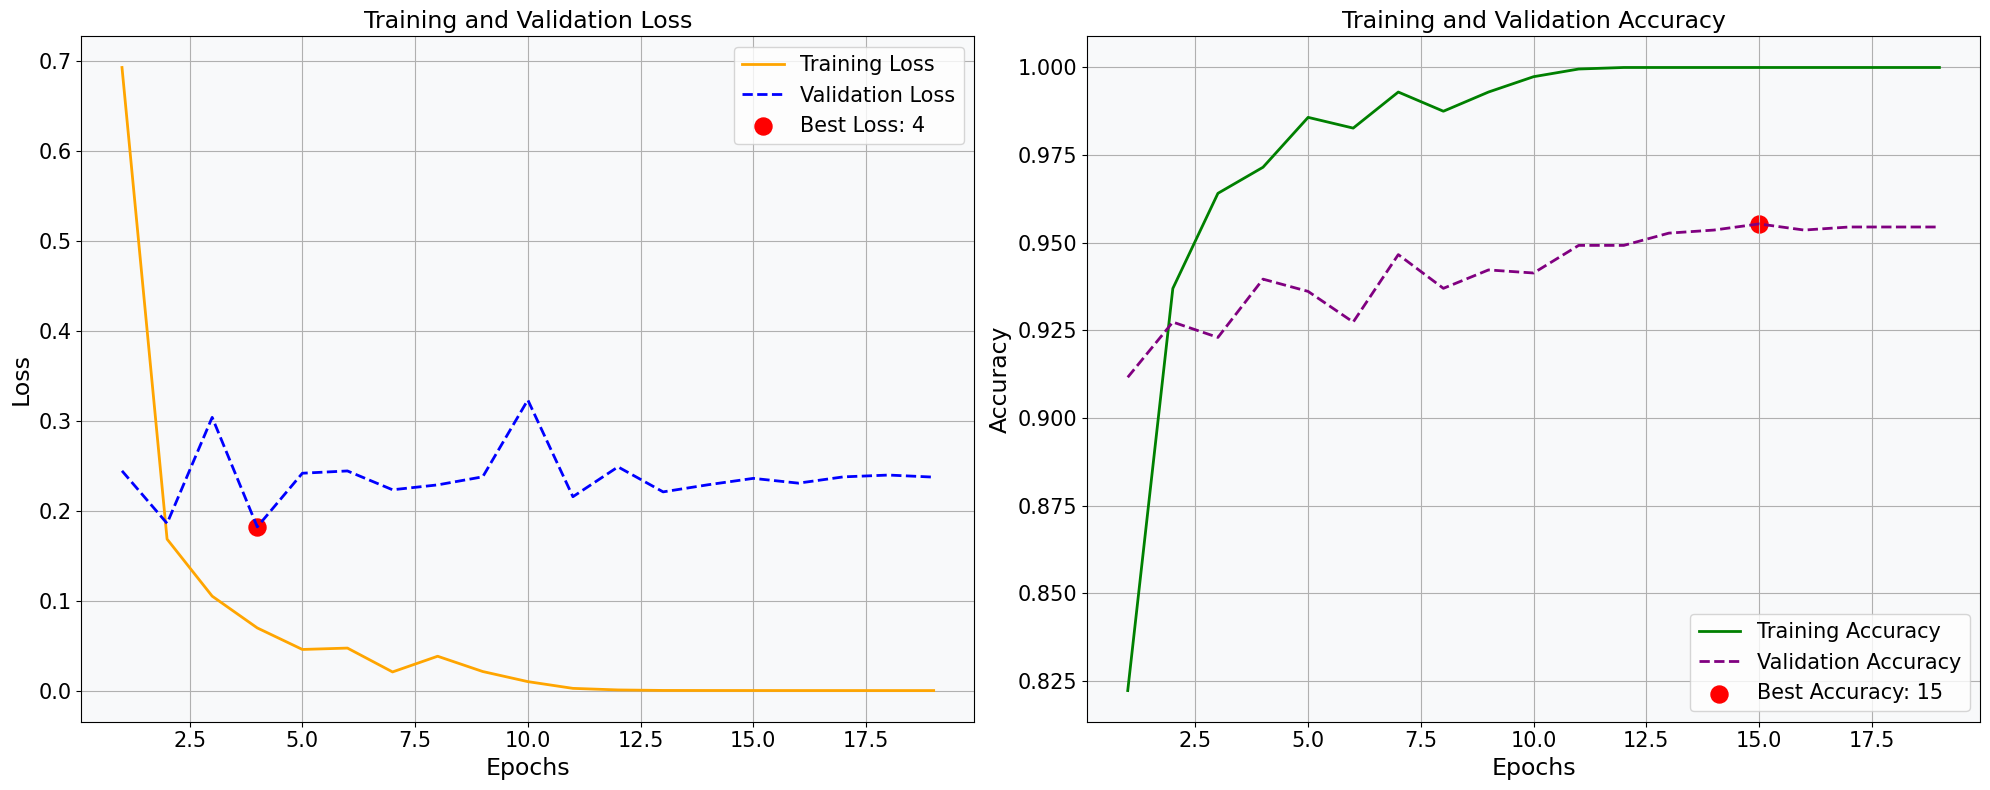

In [79]:
plot_training_history(history6)

In [80]:
train_score = model.evaluate(train_images)
valid_score = model.evaluate(val_images)
test_score = model.evaluate(test_images)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

41/41 [==============================] - 50s 1s/step - loss: 0.2039 - accuracy: 0.9634
Train Loss:  0.0001221877319039777
Train Accuracy:  1.0
--------------------
Validation Loss:  0.23612135648727417
Validation Accuracy:  0.9553805589675903
--------------------
Test Loss:  0.20394830405712128
Test Accuracy:  0.9633867144584656


In [81]:
save_history(history6, "history6.pkl")

In [82]:
model.save('model6.h5')